In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sample_submission.csv
/kaggle/input/subjects.csv
/kaggle/input/tasks.csv
/kaggle/input/defog_metadata.csv
/kaggle/input/daily_metadata.csv
/kaggle/input/events.csv
/kaggle/input/tdcsfog_metadata.csv
/kaggle/input/unlabeled/48b636e0f5.parquet
/kaggle/input/unlabeled/9fb7805d99.parquet
/kaggle/input/unlabeled/e658b0aa3d.parquet
/kaggle/input/unlabeled/1c3719ea59.parquet
/kaggle/input/unlabeled/164adaed7b.parquet
/kaggle/input/unlabeled/24016102f2.parquet
/kaggle/input/unlabeled/8ca674a988.parquet
/kaggle/input/unlabeled/48081794eb.parquet
/kaggle/input/unlabeled/cb8698473f.parquet
/kaggle/input/unlabeled/b15168b788.parquet
/kaggle/input/unlabeled/e328c64434.parquet
/kaggle/input/unlabeled/5e13d48878.parquet
/kaggle/input/unlabeled/96f57b4a40.parquet
/kaggle/input/unlabeled/ef1db3ca64.parquet
/kaggle/input/unlabeled/3fe2624b51.parquet
/kaggle/input/unlabeled/418a1ca2c1.parquet
/kaggle/input/unlabeled/bfb2732959.parquet
/kaggle/input/unlabeled/07a96f89ec.parquet
/kaggle/input

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [3]:
pip list

Package                                  Version
---------------------------------------- ------------------
absl-py                                  1.4.0
accelerate                               0.28.0
access                                   1.1.9
affine                                   2.4.0
aiobotocore                              2.12.2
aiofiles                                 22.1.0
aiohttp                                  3.9.1
aiohttp-cors                             0.7.0
aioitertools                             0.11.0
aiorwlock                                1.3.0
aiosignal                                1.3.1
aiosqlite                                0.19.0
albumentations                           1.4.0
alembic                                  1.13.1
altair                                   5.3.0
annotated-types                          0.6.0
annoy                                    1.17.3
anyio                                    4.2.0
apache-beam                           

In [4]:
#subjects or patient
subjects=pd.read_csv("/kaggle/input/subjects.csv")
#events 
events=pd.read_csv("/kaggle/input/events.csv")
#tasks 
task=pd.read_csv("/kaggle/input/tasks.csv")
#defog metadata has subject's data  in home 
defog_metadata=pd.read_csv("/kaggle/input/defog_metadata.csv")
#tdcsfog metadata has subject's data in lab 
tdcs_metadata=pd.read_csv("/kaggle/input/tdcsfog_metadata.csv")
#test data 
test = glob.glob('/kaggle/input/test/defog/**')
#train data
train_tdcs=glob.glob('/kaggle/input/train/tdcsfog/**')
train_defog=glob.glob('/kaggle/input/train/defog/**')

In [5]:
#function to assign Id to a dataset row from its filename
def readfiles(file_path):
    df=pd.read_csv(file_path)
    df['Id'] = file_path.split("/")[-1].split(".")[0]
    
    return df
    

In [6]:
#Test Data first
test_defog = pd.concat([readfiles(f) for f in test]).fillna(0);   
test_defog


,Time,AccV,AccML,AccAP,Id
0,0,-0.914652,-0.300851,0.298156,02ab235146
1,1,-0.914367,-0.301572,0.298325,02ab235146
2,2,-0.779540,-0.343197,0.275690,02ab235146
3,3,-0.993162,-0.270281,0.315775,02ab235146
4,4,-0.948767,-0.307849,0.297191,02ab235146
...,...,...,...,...,...
281683,281683,-0.899299,-0.232668,0.389147,02ab235146
281684,281684,-0.901973,-0.233051,0.390114,02ab235146
281685,281685,-0.901690,-0.231888,0.391896,02ab235146
281686,281686,-0.899576,-0.232429,0.391106,02ab235146


In [7]:
#giving id to train/defog data
train_defog = pd.concat([readfiles(f) for f in train_defog]).fillna(0);   
train_defog

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Valid,Task,Id
0,0,-1.002697,0.022371,0.068304,0,0,0,False,False,be9d33541d
1,1,-1.002641,0.019173,0.066162,0,0,0,False,False,be9d33541d
2,2,-0.999820,0.019142,0.067536,0,0,0,False,False,be9d33541d
3,3,-0.998023,0.018378,0.068409,0,0,0,False,False,be9d33541d
4,4,-0.998359,0.016726,0.066448,0,0,0,False,False,be9d33541d
...,...,...,...,...,...,...,...,...,...,...
109120,109120,-0.939241,0.031564,-0.394737,0,0,0,False,False,06414383cf
109121,109121,-0.941096,0.031582,-0.392626,0,0,0,False,False,06414383cf
109122,109122,-0.940131,0.029092,-0.394385,0,0,0,False,False,06414383cf
109123,109123,-0.939872,0.028058,-0.398664,0,0,0,False,False,06414383cf


In [8]:
#subject,defog_metadata
subject_defog_metadata=pd.merge(subjects,defog_metadata,on="Subject",how="inner")
subject_defog_metadata

,Subject,Visit_x,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ,Id,Visit_y,Medication
0,00f674,2.0,63,M,27.0,43.0,49.0,24,3f3b08f78d,1,off
1,00f674,2.0,63,M,27.0,43.0,49.0,24,41bc215f97,2,on
2,00f674,2.0,63,M,27.0,43.0,49.0,24,4c3aa8ea6e,1,on
3,00f674,2.0,63,M,27.0,43.0,49.0,24,b4365bba9d,2,off
4,00f674,1.0,63,M,27.0,31.0,30.0,26,3f3b08f78d,1,off
...,...,...,...,...,...,...,...,...,...,...,...
245,e1f62e,2.0,79,F,8.0,38.0,64.0,28,9506859311,2,off
246,e86b6e,2.0,61,F,7.0,47.0,45.0,22,4ec23c3d98,2,off
247,e86b6e,2.0,61,F,7.0,47.0,45.0,22,a2f1a8ab76,2,on
248,f28337,1.0,72,M,16.0,52.0,50.0,18,139f60d29b,1,off


In [9]:
#defog_metadata+subject+train_defog
defog_final=pd.merge(train_defog,subject_defog_metadata,on="Id",how="inner")
defog_final

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Valid,Task,Id,Subject,Visit_x,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ,Visit_y,Medication
0,0,-1.002697,0.022371,0.068304,0,0,0,False,False,be9d33541d,f28337,1.0,72,M,16.0,52.0,50.0,18,1,on
1,1,-1.002641,0.019173,0.066162,0,0,0,False,False,be9d33541d,f28337,1.0,72,M,16.0,52.0,50.0,18,1,on
2,2,-0.999820,0.019142,0.067536,0,0,0,False,False,be9d33541d,f28337,1.0,72,M,16.0,52.0,50.0,18,1,on
3,3,-0.998023,0.018378,0.068409,0,0,0,False,False,be9d33541d,f28337,1.0,72,M,16.0,52.0,50.0,18,1,on
4,4,-0.998359,0.016726,0.066448,0,0,0,False,False,be9d33541d,f28337,1.0,72,M,16.0,52.0,50.0,18,1,on
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23811627,109122,-0.940131,0.029092,-0.394385,0,0,0,False,False,06414383cf,8c1f5e,1.0,61,F,7.0,45.0,52.0,22,2,off
23811628,109123,-0.939872,0.028058,-0.398664,0,0,0,False,False,06414383cf,8c1f5e,2.0,61,F,7.0,47.0,45.0,22,2,off
23811629,109123,-0.939872,0.028058,-0.398664,0,0,0,False,False,06414383cf,8c1f5e,1.0,61,F,7.0,45.0,52.0,22,2,off
23811630,109124,-0.939006,0.026628,-0.398454,0,0,0,False,False,06414383cf,8c1f5e,2.0,61,F,7.0,47.0,45.0,22,2,off


In [10]:
#function to reduce memory size
def reduce_memory_usage(df):
    
    start_mem = df.memory_usage().sum() / 1024 ** 2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype.name
        if ((col_type != 'datetime64[ns]') & (col_type != 'category')):
            if (col_type != 'object'):
                c_min = df[col].min()
                c_max = df[col].max()

                if str(col_type)[:3] == 'int':
                    if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int8)
                    elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int16)
                    elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)

                else:
                    if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                        df[col] = df[col].astype(np.float16)
                    elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                        df[col] = df[col].astype(np.float32)
                    else:
                        pass
            else:
                df[col] = df[col].astype('category')
    mem_usg = df.memory_usage().sum() / 1024 ** 2 
    print("Memory usage became: ",mem_usg," MB")
    
    return df

In [11]:
#reducing memory size
defog_final=reduce_memory_usage(defog_final)

Memory usage of dataframe is 3315.45 MB
Memory usage became:  726.6777114868164  MB


In [12]:
defog_final1=pd.merge(defog_final[3000000:10000000],events,on="Id",how="inner")


defog_final1.groupby("Type").count()


,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Valid,Task,Id,...,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ,Visit_y,Medication,Init,Completion,Kinetic
Type,,,,,,,,,,,,,,,,,,,,,
StartHesitation,263916,263916,263916,263916,263916,263916,263916,263916,263916,263916,...,263916,263916,263916,263916,263916,263916,263916,263916,263916,263916
Turn,78205678,78205678,78205678,78205678,78205678,78205678,78205678,78205678,78205678,78205678,...,78205678,78205678,78205678,78205678,78205678,78205678,78205678,78205678,78205678,78205678
Walking,7442929,7442929,7442929,7442929,7442929,7442929,7442929,7442929,7442929,7442929,...,7442929,7442929,7442929,7442929,7442929,7442929,7442929,7442929,7442929,7442929


In [13]:
defog_final1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85912523 entries, 0 to 85912522
Data columns (total 24 columns):
 #   Column           Dtype   
---  ------           -----   
 0   Time             int32   
 1   AccV             float16 
 2   AccML            float16 
 3   AccAP            float16 
 4   StartHesitation  int8    
 5   Turn             int8    
 6   Walking          int8    
 7   Valid            float16 
 8   Task             float16 
 9   Id               object  
 10  Subject          category
 11  Visit_x          float16 
 12  Age              int8    
 13  Sex              category
 14  YearsSinceDx     float16 
 15  UPDRSIII_On      float16 
 16  UPDRSIII_Off     float16 
 17  NFOGQ            int8    
 18  Visit_y          int8    
 19  Medication       category
 20  Init             float64 
 21  Completion       float64 
 22  Type             object  
 23  Kinetic          float64 
dtypes: category(3), float16(9), float64(3), int32(1), int8(6), object(2)
memor

In [14]:
columns_to_remove = ['Walking', 'Turn', 'StartHesitation','Valid','Task','Subject','Visit_y','Id']

defog_final1 = defog_final1.drop(columns=columns_to_remove)


In [15]:
defog_final1[:200000].groupby("Type").count()


,Time,AccV,AccML,AccAP,Visit_x,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ,Medication,Init,Completion,Kinetic
Type,,,,,,,,,,,,,,,
Turn,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000


In [16]:
#binarization of gender
defog_final1["Sex"]=defog_final1["Sex"].map({"M":1,"F":0})
defog_final1["Medication"]=defog_final1["Medication"].map({"on":1,"off":0})

# defog_final1["Type"]=defog_final1["Type"].map({"Walking":10,"Turn":11,"StartHesitation":12})


In [17]:
# #Changing type into binary classed i.e 0 and 1
# defog_final1=pd.get_dummies(defog_final1, columns=['Type'])

In [18]:
moved_column = defog_final1.pop("Type")
defog_final1["Type"] = moved_column
defog_final1

,Time,AccV,AccML,AccAP,Visit_x,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ,Medication,Init,Completion,Kinetic,Type
0,34763,-0.953125,0.031250,0.248657,2.0,69,1,17.0,34.0,47.0,20,0,339.559,340.867,1.0,Turn
1,34763,-0.953125,0.031250,0.248657,2.0,69,1,17.0,34.0,47.0,20,0,370.428,372.820,1.0,Turn
2,34763,-0.953125,0.031250,0.248657,2.0,69,1,17.0,34.0,47.0,20,0,451.240,451.718,1.0,Turn
3,34763,-0.953125,0.031250,0.248657,2.0,69,1,17.0,34.0,47.0,20,0,495.348,496.478,1.0,Turn
4,34763,-0.953125,0.031250,0.248657,2.0,69,1,17.0,34.0,47.0,20,0,1037.722,1040.470,1.0,Turn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85912518,18365,-0.906250,-0.046875,0.265625,2.0,63,1,27.0,43.0,49.0,24,1,878.209,879.315,1.0,Walking
85912519,18365,-0.906250,-0.046875,0.265625,2.0,63,1,27.0,43.0,49.0,24,1,1348.080,1351.800,1.0,Turn
85912520,18365,-0.906250,-0.046875,0.265625,2.0,63,1,27.0,43.0,49.0,24,1,1404.120,1413.687,1.0,Turn
85912521,18365,-0.906250,-0.046875,0.265625,2.0,63,1,27.0,43.0,49.0,24,1,1416.240,1430.472,1.0,Turn


In [19]:
#reduce defog_final1 
defog_final1=reduce_memory_usage(defog_final1)

Memory usage of dataframe is 4424.36 MB
Memory usage became:  2376.0449171066284  MB


In [20]:
defog_final1.groupby("Type").count()

/tmp/ipykernel_33/774057284.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  defog_final1.groupby("Type").count()


,Time,AccV,AccML,AccAP,Visit_x,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ,Medication,Init,Completion,Kinetic
Type,,,,,,,,,,,,,,,
StartHesitation,263916,263916,263916,263916,263916,263916,263916,263916,263916,263916,263916,263916,263916,263916,263916
Turn,78205678,78205678,78205678,78205678,78205678,78205678,78205678,78205678,78205678,78205678,78205678,78205678,78205678,78205678,78205678
Walking,7442929,7442929,7442929,7442929,7442929,7442929,7442929,7442929,7442929,7442929,7442929,7442929,7442929,7442929,7442929


In [21]:
selected_sh = defog_final1.query("Type == 'StartHesitation'")
selected_turn = defog_final1.query("Type == 'Turn'")
selected_walk = defog_final1.query("Type == 'Walking'")

In [22]:
selected=pd.concat([selected_sh,selected_turn,selected_walk])

selected =selected.sample(frac=1, random_state=42)  # Use a random_state for reproducibility

# Reset index if needed
selected.reset_index(drop=True, inplace=True)


In [23]:
selected = selected.astype(dtype={'AccV': np.float64, 'AccML': np.float64,'AccAP': np.float64,'Visit_x': np.float64,'YearsSinceDx': np.float64,'UPDRSIII_On': np.float64,'UPDRSIII_Off': np.float64,'Init': np.float64,'Completion': np.float64,'Kinetic': np.float64})

In [24]:
selected[:10000]

,Time,AccV,AccML,AccAP,Visit_x,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ,Medication,Init,Completion,Kinetic,Type
0,8252,-0.849121,-0.088928,-0.473877,2.0,73,0,5.0,48.0,47.0,24,0,754.0000,756.50,0.0,Turn
1,44309,-1.087891,-0.076965,-0.255371,1.0,77,1,7.0,21.0,44.0,21,0,195.0000,195.50,1.0,Turn
2,40917,-0.986328,-0.127075,-0.098267,2.0,62,1,13.0,37.0,43.0,15,0,811.5000,812.00,1.0,Turn
3,58819,-0.854004,-0.025848,-0.279297,1.0,77,1,7.0,21.0,44.0,21,0,345.7500,349.25,1.0,Turn
4,54861,-0.921875,0.002665,0.396973,2.0,77,1,7.0,38.0,39.0,23,0,461.2500,467.50,1.0,Turn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,62096,-0.946289,0.115967,0.354736,1.0,72,1,16.0,35.0,46.0,26,0,105.9375,106.50,1.0,Turn
9996,39922,-0.993164,0.163452,0.171021,1.0,75,1,26.0,47.0,75.0,24,0,82.4375,83.50,1.0,Turn
9997,163855,-0.966309,0.222656,-0.083008,2.0,72,1,16.0,23.0,41.0,22,0,937.5000,939.00,1.0,Turn
9998,227587,-0.937500,-0.121399,-0.281250,2.0,65,1,7.0,57.0,65.0,24,1,1840.0000,1842.00,0.0,Turn


In [25]:
selected.groupby("Type").count()

/tmp/ipykernel_33/3920817503.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  selected.groupby("Type").count()


,Time,AccV,AccML,AccAP,Visit_x,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ,Medication,Init,Completion,Kinetic
Type,,,,,,,,,,,,,,,
StartHesitation,263916,263916,263916,263916,263916,263916,263916,263916,263916,263916,263916,263916,263916,263916,263916
Turn,78205678,78205678,78205678,78205678,78205678,78205678,78205678,78205678,78205678,78205678,78205678,78205678,78205678,78205678,78205678
Walking,7442929,7442929,7442929,7442929,7442929,7442929,7442929,7442929,7442929,7442929,7442929,7442929,7442929,7442929,7442929


In [74]:
X_demo = selected[:4000000].iloc[:, :-1]  # Features
y_demo = selected[:4000000].iloc[:, -1]   # Target variable


In [75]:
# X_demo = defog_final1[:20000000].iloc[:, :-1]  # Features
# y_demo = defog_final1[:20000000].iloc[:, -1]   # Target variable

**GAUSSIAN NAIVE BAYESIAN  WITH ROC,AuC****

**LATER**

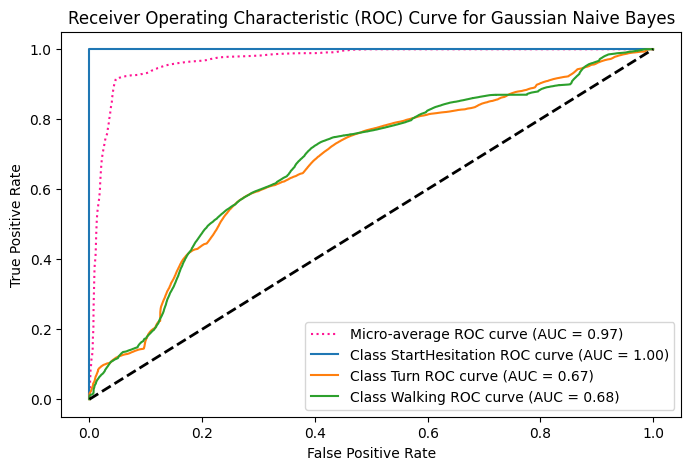

In [76]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.multiclass import OneVsRestClassifier


# label  binarizing 
encoder = LabelEncoder()
y_bin = label_binarize(encoder.fit_transform(y_demo),classes=[0,1,2])

# Split 
X_train, X_test, y_train, y_test = train_test_split(X_demo, y_bin, test_size=0.2, random_state=42)


gnb = GaussianNB()


classifier = OneVsRestClassifier(gnb)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# ROC CURVE USING LOOP
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_bin.shape[1]):  # Number of classes
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure(figsize=(8, 5))
plt.plot(fpr["micro"], tpr["micro"], label=f'Micro-average ROC curve (AUC = {roc_auc["micro"]:.2f})', color='deeppink', linestyle=':')
for i, class_name in enumerate(encoder.classes_):
    plt.plot(fpr[i], tpr[i], label=f'Class {class_name} ROC curve (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Gaussian Naive Bayes')
plt.legend(loc='lower right')
plt.show()


In [77]:
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import roc_curve, auc
# from sklearn.preprocessing import label_binarize, LabelEncoder
# from sklearn.multiclass import OneVsRestClassifier

# # Label binarizing
# encoder = LabelEncoder()
# y_bin = label_binarize(encoder.fit_transform(y_demo), classes=[0, 1, 2])

# # Split
# X_train, X_test, y_train, y_test = train_test_split(X_demo, y_bin, test_size=0.2, random_state=42)

# # Logistic Regression Classifier
# log_reg = LogisticRegression(max_iter=1000)

# classifier = OneVsRestClassifier(log_reg)
# y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# # ROC CURVE USING LOOP
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(y_bin.shape[1]):  # Number of classes
#     fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# # Plot ROC curve
# plt.figure(figsize=(8, 5))
# plt.plot(fpr["micro"], tpr["micro"], label=f'Micro-average ROC curve (AUC = {roc_auc["micro"]:.2f})', color='deeppink', linestyle=':')
# for i, class_name in enumerate(encoder.classes_):
#     plt.plot(fpr[i], tpr[i], label=f'Class {class_name} ROC curve (AUC = {roc_auc[i]:.2f})')

# plt.plot([0, 1], [0, 1], 'k--', lw=2)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
# plt.legend(loc='lower right')
# plt.show()


**METRICS FOR THE MODEL**

In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming you have the true labels for the test set
y_true = y_test

# Convert predicted probabilities to predicted labels (using argmax)
y_pred = y_score.argmax(axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true.argmax(axis=1), y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true.argmax(axis=1), y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Print classification report
class_names = encoder.classes_
classification_rep = classification_report(y_true.argmax(axis=1), y_pred, target_names=class_names)
print('Classification Report:')
print(classification_rep)


Accuracy: 0.91
Confusion Matrix:
[[  2505      0      0]
 [     0 728537      0]
 [  2345  66613      0]]


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
                 precision    recall  f1-score   support

StartHesitation       0.52      1.00      0.68      2505
           Turn       0.92      1.00      0.96    728537
        Walking       0.00      0.00      0.00     68958

       accuracy                           0.91    800000
      macro avg       0.48      0.67      0.55    800000
   weighted avg       0.84      0.91      0.87    800000



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
# sh,turn,walk  i wanted to see how many labels has start_hesitation
# j=0
# [j+1 for i in y_bin if ([1,0,0] & i).all() ]
# print(j)



In [32]:
#Naive Bayesian CLassifier

**TEST DATA
**

In [33]:
#_metadata+subject+test_defog gives test data for defog
test_final=pd.merge(test_defog,subject_defog_metadata,on="Id",how="inner")
test_final["Sex"]=test_final["Sex"].map({"M":1,"F":0})
test_final["Medication"]=test_final["Medication"].map({"on":1,"off":0})




final_test = pd.merge(test_final, events, how='inner', on='Id').fillna(-1)

columns_to_remove = ['Subject','Visit_y','Id','Type']
test_final = final_test.drop(columns=columns_to_remove)
test_final

/tmp/ipykernel_33/3776791565.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_test = pd.merge(test_final, events, how='inner', on='Id').fillna(-1)


,Time,AccV,AccML,AccAP,Visit_x,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ,Medication,Init,Completion,Kinetic
0,0,-0.914652,-0.300851,0.298156,1.0,79,0,8.0,52.0,55.0,28,1,1929.213,1932.575,-1.0
1,0,-0.914652,-0.300851,0.298156,1.0,79,0,8.0,52.0,55.0,28,1,2039.022,2040.564,-1.0
2,0,-0.914652,-0.300851,0.298156,1.0,79,0,8.0,52.0,55.0,28,1,2250.646,2251.992,-1.0
3,0,-0.914652,-0.300851,0.298156,1.0,79,0,8.0,52.0,55.0,28,1,2664.332,2664.810,-1.0
4,0,-0.914652,-0.300851,0.298156,1.0,79,0,8.0,52.0,55.0,28,1,2745.574,2745.814,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3943627,281687,-0.900289,-0.232363,0.390735,2.0,79,0,8.0,38.0,64.0,28,1,2250.646,2251.992,-1.0
3943628,281687,-0.900289,-0.232363,0.390735,2.0,79,0,8.0,38.0,64.0,28,1,2664.332,2664.810,-1.0
3943629,281687,-0.900289,-0.232363,0.390735,2.0,79,0,8.0,38.0,64.0,28,1,2745.574,2745.814,-1.0
3943630,281687,-0.900289,-0.232363,0.390735,2.0,79,0,8.0,38.0,64.0,28,1,2745.826,2746.384,-1.0


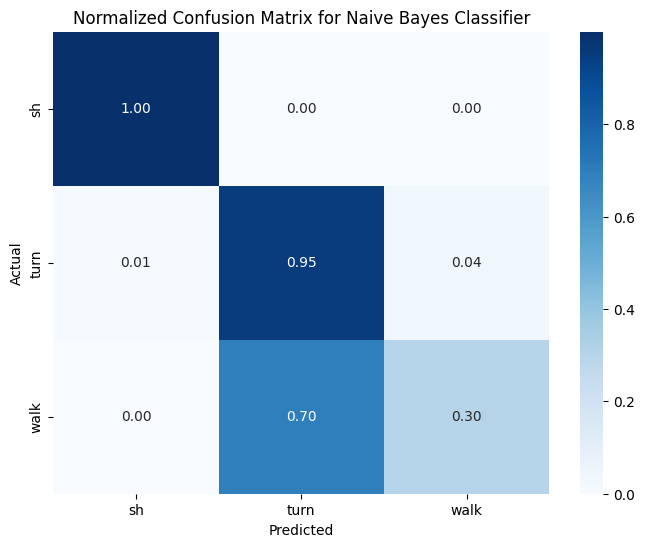

In [83]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Given normalized confusion matrix
normalized_confusion_matrix = np.array([[0.99999456, 0.0, 0.0],
                                        [0.00930344, 0.95016562, 0.04053094],
                                        [0.0, 0.69837809, 0.30162191]])

# Define class names for the axis labels
class_names = ['sh', 'turn', 'walk']

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_confusion_matrix, annot=True, cmap='Blues', fmt='.2f',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix for Naive Bayes Classifier')
plt.show()


In [34]:
# test_final.head(10)

In [35]:
#With test data
test_predict=classifier.predict(X[:5000])
test_predict


# Final_dfW = pd.DataFrame(test_predict, columns = ['Type'])

# submission=pd.concat([final_test['Id'],Final_dfW],axis=1)
# # submission=submission[submission['Id']=="003f117e14")
# submission

NameError: name 'X' is not defined

In [ ]:
# # df = pd.DataFrame(test_final)
# test_final.to_csv('Test1.csv', index=False)

In [ ]:
classes=["sh","turn","walk"]
decoded_classes = []
for i in X[:5000]:
    class_index = np.argmax(i)
    decoded_class = classes[class_index]
    decoded_classes.append(decoded_class)
print(decoded_classes)
     
    
    

In [ ]:
import csv
classes=["sh","turn","walk"]
d_classes = []
for i in y_bin[:5000]:
    class_index = np.argmax(i)
    d_class = classes[class_index]
    d_classes.append(d_class)
# d_classes

 



In [ ]:
# import joblib
# joblib.dump(classifier, 'final_naive_bayes1.pkl')
# print(f'Download your model [here](sandbox:/kaggle/working/your_model_filename.joblib)')



In [ ]:
# import joblib
# joblib.dump(classifier,"nb.pkl")

In [ ]:
# import csv
# classes=["sh","turn","walk"]
# d_classes_pred = []
# for i in y_pred:
#     class_index = np.argmax(i)
#     d_class = classes[class_index]
#     d_classes_pred.append(d_class)



In [ ]:
import csv
classes=["sh","turn","walk"]
d_classes_true = []
for i in y_true:
    class_index = np.argmax(i)
    d_class = classes[class_index]
    d_classes_true.append(d_class)



In [ ]:
# change y_pred to string classes
class_encoding = {"sh": 0, "turn": 1, "walk": 2}

# Example list of numeric labels


# Decode the entire list
class_names_list = [key for label in y_pred for key, value in class_encoding.items() if value == label]





In [ ]:

#evaluation

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics

# Example multiclass confusion matrix data (replace this with your actual data)


# Compute confusion matrix
cm = confusion_matrix(d_classes_true, class_names_list)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(d_classes_true),
            yticklabels=np.unique(d_classes_true))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayesian')
plt.show()
